## Business Understanding

## Data Understanding

### Inspect Basic Information

In [2]:
import pandas as pd

# Load datasets using your local paths
ratings_df = pd.read_csv(r'C:\Users\MNJOROGE16\Desktop\Moringa\phase_4\ph4_project\Movie-Recommendation-System-Group_12-Project\Data\ml-latest-small\ratings.csv')
movies_df = pd.read_csv(r'C:\Users\MNJOROGE16\Desktop\Moringa\phase_4\ph4_project\Movie-Recommendation-System-Group_12-Project\Data\ml-latest-small\movies.csv')
tags_df = pd.read_csv(r'C:\Users\MNJOROGE16\Desktop\Moringa\phase_4\ph4_project\Movie-Recommendation-System-Group_12-Project\Data\ml-latest-small\tags.csv')
links_df = pd.read_csv(r'C:\Users\MNJOROGE16\Desktop\Moringa\phase_4\ph4_project\Movie-Recommendation-System-Group_12-Project\Data\ml-latest-small\links.csv')

# Inspect Basic Information
def inspect_basic_info():
    print("Basic Info for Ratings")
    print(ratings_df.head())  # Display the first few rows of the ratings dataset
    print(f"Ratings Data: {ratings_df.shape} rows, {ratings_df.columns.tolist()} columns")  # Number of rows/columns
    
    print("\nBasic Info for Movies")
    print(movies_df.head())  # Display the first few rows of the movies dataset
    print(f"Movies Data: {movies_df.shape} rows, {movies_df.columns.tolist()} columns")
    
    print("\nBasic Info for Tags")
    print(tags_df.head())  # Display the first few rows of the tags dataset
    print(f"Tags Data: {tags_df.shape} rows, {tags_df.columns.tolist()} columns")
    
    print("\nBasic Info for Links")
    print(links_df.head())  # Display the first few rows of the links dataset
    print(f"Links Data: {links_df.shape} rows, {links_df.columns.tolist()} columns")

inspect_basic_info()


Basic Info for Ratings
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
Ratings Data: (100836, 4) rows, ['userId', 'movieId', 'rating', 'timestamp'] columns

Basic Info for Movies
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Movies Data: (9742, 3) rows, ['movieId', 'titl

#### Output Interpretation - Inspect Basic Information 



**Ratings Data set**

This dataset has 100,836 rows and 4 columns

Columns:

userId: The ID of the user.

movieId: The ID of the movie that was rated.

rating: The rating given by the user, on a scale of 0.5 to 5.0 stars.

timestamp: The time at which the rating was made (as a Unix timestamp)

**Movies Dataset**

This dataset contains 9,742 rows and 3 columns.

Columns:

movieId: The unique ID for each movie.

title: The title of the movie along with the release year (in parentheses).

genres: The genres associated with the movie, separated by a pipe | symbol.

**Tags Dataset**

This dataset has 3,683 rows and 4 columns.

columns:

userId: The ID of the user who applied the tag.

movieId: The ID of the movie being tagged.

tag: A free-text tag applied to the movie.

timestamp: The time at which the tag was applied (as a Unix timestamp).

**Links Dataset**

This dataset contains 9,742 rows and 3 columns.

Columns:

movieId: The MovieLens movie ID.

imdbId: The corresponding IMDb ID for the movie.

tmdbId: The corresponding TMDb (The Movie Database) ID for the movie.

In [20]:
# Ratings Overview
num_users = ratings_df['userId'].nunique()  # Number of unique users
num_movies = ratings_df['movieId'].nunique()  # Number of unique movies rated
ratings_distribution = ratings_df['rating'].value_counts().sort_index()  # Distribution of ratings (1-5 stars)

print(f"\nNumber of unique users: {num_users}")
print(f"Number of unique movies rated: {num_movies}")
print("Ratings distribution:")
print(ratings_distribution)



Number of unique users: 610
Number of unique movies rated: 9724
Ratings distribution:
0.5     1370
1.0     2811
1.5     1791
2.0     7551
2.5     5550
3.0    20047
3.5    13136
4.0    26818
4.5     8551
5.0    13211
Name: rating, dtype: int64


#### Output Interpretation - Ratings Overview

**Most Common Ratings**

4.0 stars is the most frequent rating with 26,818 occurrences, followed by 3.0 stars with 20,047 occurrences.
This suggests that users tend to rate movies on the higher end of the scale.

**Higher Ratings Dominate**

A significant portion of the ratings is 3 stars and above, indicating that users are more likely to give higher ratings. This could reflect positive sentiment towards the movies they choose to watch.

**Fewer Low Ratings**

Lower ratings, like 0.5 stars, are relatively rare with only 1,370 ratings. This could indicate that users are more selective with their ratings, and they typically don't give very low scores unless they really dislike a movie.

**Balanced Mid-range Ratings**

Ratings like 2.0 stars, 2.5 stars, and 3.5 stars also have decent representation, showing that users provide a good mix of mid-range ratings when they feel neutral about a movie.

### Movies Overview

In [4]:
# Movies Overview
num_unique_movies = movies_df['movieId'].nunique()  # Number of unique movies
genres_distribution = movies_df['genres'].value_counts()  # Count of each genre

print(f"\nNumber of unique movies: {num_unique_movies}")
print("Genres distribution (top 10):")
print(genres_distribution.head(10))  # Top 10 most common genres



Number of unique movies: 9742
Genres distribution (top 10):
Drama                   1053
Comedy                   946
Comedy|Drama             435
Comedy|Romance           363
Drama|Romance            349
Documentary              339
Comedy|Drama|Romance     276
Drama|Thriller           168
Horror                   167
Horror|Thriller          135
Name: genres, dtype: int64


#### Output Interpretation - Movies Overview

**Drama is the Most Common Genre**

Drama is the most frequent genre, with 1,053 movies classified as dramas. This indicates that drama movies are highly represented in the dataset and may reflect the popularity of this genre among the movies included.

**Comedy is Also Very Common**

Comedy is the second most frequent genre with 946 movies. This shows that comedy is also a significant portion of the movie dataset and may be popular among viewers.

**Multiple Genre Combinations**

Several movies belong to multiple genres, such as Comedy|Drama (435 movies) and Comedy|Romance (363 movies). This suggests that many movies are categorized into more than one genre, which could help provide more nuanced recommendations in a recommendation system.
Combinations like Comedy|Drama|Romance (276 movies) reflect more complex genre blending, offering users a wide range of mixed-genre movies.

**Niche Genres like Horror**

Horror (167 movies) and Horror|Thriller (135 movies) show that while horror movies are not as common as drama or comedy, they are still a notable part of the dataset.

### Tags Overview

In [5]:
# Tags Overview
num_tags = tags_df.shape[0]  # Total number of tags applied
print(f"\nNumber of tags applied: {num_tags}")



Number of tags applied: 3683


#### Output Interpretation - Tags Overview

3,683 tags have been applied by users to movies in the dataset. Each tag is a word or short phrase that describes some aspect of a movie, typically applied by users to express their thoughts, opinions, or categorize movies in ways beyond the standard genres.

### Links Overview

In [6]:
# Links Overview
missing_links = links_df.isnull().sum()  # Count of missing values in the links dataset
print("\nMissing data in Links:")
print(missing_links)



Missing data in Links:
movieId    0
imdbId     0
tmdbId     8
dtype: int64


#### Output Interpretation - Links Overview

### Exploring Data Distributions

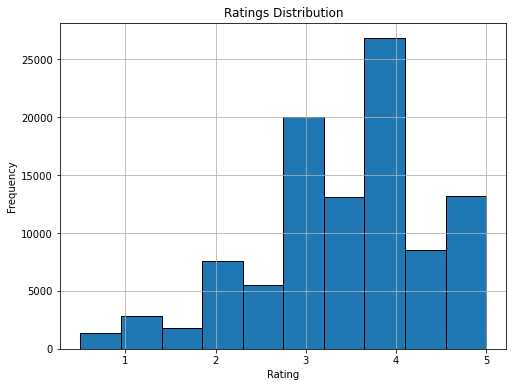


Average number of ratings per user: 165.30491803278687
Average number of ratings per movie: 10.369806663924312


In [7]:
import matplotlib.pyplot as plt

# Ratings Distribution Histogram
plt.figure(figsize=(8,6))
ratings_df['rating'].hist(bins=10, edgecolor='black')  # Plot a histogram of ratings
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Average number of ratings per user
user_activity = ratings_df.groupby('userId')['rating'].count()  # Count of ratings per user
print(f"\nAverage number of ratings per user: {user_activity.mean()}")

# Average number of ratings per movie
movie_popularity = ratings_df.groupby('movieId')['rating'].count()  # Count of ratings per movie
print(f"Average number of ratings per movie: {movie_popularity.mean()}")


#### Output Interpretation - Data Distributions 

### Check for Missing Data and Duplicates

In [8]:
# Check for Missing Data and Duplicates
def check_missing_and_duplicates():
    print("\nMissing Values:")
    print("Ratings missing values:\n", ratings_df.isnull().sum())  # Check missing values in ratings dataset
    print("Movies missing values:\n", movies_df.isnull().sum())  # Check missing values in movies dataset
    print("Tags missing values:\n", tags_df.isnull().sum())  # Check missing values in tags dataset
    print("Links missing values:\n", links_df.isnull().sum())  # Check missing values in links dataset

    print("\nDuplicate Values:")
    print("Ratings duplicates:", ratings_df.duplicated().sum())  # Check duplicates in ratings dataset
    print("Movies duplicates:", movies_df.duplicated().sum())  # Check duplicates in movies dataset
    print("Tags duplicates:", tags_df.duplicated().sum())  # Check duplicates in tags dataset
    print("Links duplicates:", links_df.duplicated().sum())  # Check duplicates in links dataset

check_missing_and_duplicates()



Missing Values:
Ratings missing values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Movies missing values:
 movieId    0
title      0
genres     0
dtype: int64
Tags missing values:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
Links missing values:
 movieId    0
imdbId     0
tmdbId     8
dtype: int64

Duplicate Values:
Ratings duplicates: 0
Movies duplicates: 0
Tags duplicates: 0
Links duplicates: 0


#### Output Interpretation - Missing Data and Duplicates

### Time-Based Exploration

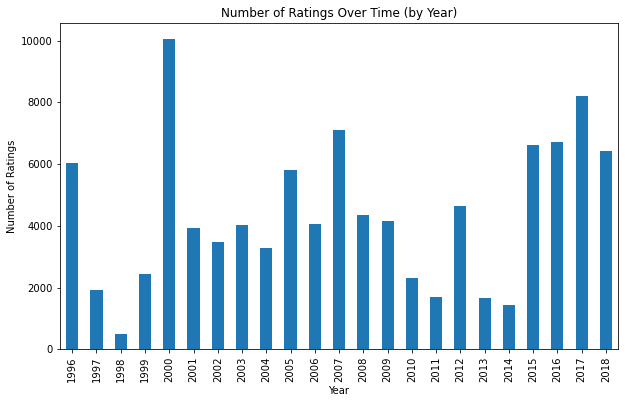

In [9]:
# Convert timestamp and analyze activity over time
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')  # Convert timestamp to datetime
ratings_df['year'] = ratings_df['timestamp'].dt.year  # Extract year from timestamp

plt.figure(figsize=(10,6))
ratings_df['year'].value_counts().sort_index().plot(kind='bar')  # Plot a bar chart of ratings by year
plt.title('Number of Ratings Over Time (by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()


#### Output Interpretation - Time-based Exploration

### Descriptive Statistics

In [10]:
# Descriptive Statistics for Ratings
print("\nDescriptive Statistics for Ratings:")
print(ratings_df['rating'].describe())  # Generate basic statistics like mean, min, max for ratings



Descriptive Statistics for Ratings:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


#### Output Interpretation - Descriptive Statistics

**Ratings Skew Towards the Higher End**

The mean and median ratings are both above 3.0, which indicates that users tend to give positive ratings more often than negative ones.
75% of the ratings are 4 stars or lower, with the remaining 25% falling between 4 and 5 stars. This reflects a general tendency for users to rate movies favorably.

**Low Variability in Ratings**

With a standard deviation of 1.04, ratings don't vary wildly. Most ratings fall within the range of 2.5 to 4.5 stars, indicating a more concentrated set of ratings.


### Data Relationships

In [11]:
# Create user-item matrix
user_item_matrix = ratings_df.pivot_table(index='userId', columns='movieId', values='rating')  # Create user-item matrix
print("\nUser-item matrix shape:", user_item_matrix.shape)


User-item matrix shape: (610, 9724)


#### Output Interpretation - Data Relationships

## Data Preparation

### Handling Missing Data

In [12]:
# Check for missing values
print("Missing values before cleaning:")
print("Ratings missing values:\n", ratings_df.isnull().sum())
print("Movies missing values:\n", movies_df.isnull().sum())
print("Tags missing values:\n", tags_df.isnull().sum())
print("Links missing values:\n", links_df.isnull().sum())

# Handle missing values
# We have a few missing tmdbId values, we will drop those rows
links_df_cleaned = links_df.dropna(subset=['tmdbId'])

print("Missing values after cleaning:")
print("Links missing values:\n", links_df_cleaned.isnull().sum())


Missing values before cleaning:
Ratings missing values:
 userId       0
movieId      0
rating       0
timestamp    0
year         0
dtype: int64
Movies missing values:
 movieId    0
title      0
genres     0
dtype: int64
Tags missing values:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
Links missing values:
 movieId    0
imdbId     0
tmdbId     8
dtype: int64
Missing values after cleaning:
Links missing values:
 movieId    0
imdbId     0
tmdbId     0
dtype: int64


### Encoding Genres

In [13]:
# Split genres into individual genre columns using one-hot encoding
movies_df['genres'] = movies_df['genres'].str.split('|')  # Split genres by '|'

# Use get_dummies to one-hot encode the genres
genres_df = movies_df['genres'].apply(lambda x: pd.Series(1, index=x)).fillna(0)

# Merge the one-hot encoded genres back to the movies dataframe
movies_with_genres_df = pd.concat([movies_df[['movieId', 'title']], genres_df], axis=1)

print(movies_with_genres_df.head())  # Check the result of the encoding


   movieId                               title  Adventure  Animation  \
0        1                    Toy Story (1995)        1.0        1.0   
1        2                      Jumanji (1995)        1.0        0.0   
2        3             Grumpier Old Men (1995)        0.0        0.0   
3        4            Waiting to Exhale (1995)        0.0        0.0   
4        5  Father of the Bride Part II (1995)        0.0        0.0   

   Children  Comedy  Fantasy  Romance  Drama  Action  ...  Horror  Mystery  \
0       1.0     1.0      1.0      0.0    0.0     0.0  ...     0.0      0.0   
1       1.0     0.0      1.0      0.0    0.0     0.0  ...     0.0      0.0   
2       0.0     1.0      0.0      1.0    0.0     0.0  ...     0.0      0.0   
3       0.0     1.0      0.0      1.0    1.0     0.0  ...     0.0      0.0   
4       0.0     1.0      0.0      0.0    0.0     0.0  ...     0.0      0.0   

   Sci-Fi  War  Musical  Documentary  IMAX  Western  Film-Noir  \
0     0.0  0.0      0.0         

### Encoding Tags

In [14]:
# Preprocess tags by converting to lowercase
tags_df['tag'] = tags_df['tag'].str.lower()

# Optionally, you can use text vectorization techniques like TF-IDF or word embeddings
# Here, we simply show the basic text preprocessing
print(tags_df.head())


   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     boxing story  1445715207
4       2    89774              mma  1445715200


### Handling Timestamp

In [15]:
# Convert timestamp in ratings to a datetime format
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

# Create additional time-based features such as year, month, or day if needed
ratings_df['year'] = ratings_df['timestamp'].dt.year
ratings_df['month'] = ratings_df['timestamp'].dt.month

print(ratings_df.head())  # Check the result of the conversion


   userId  movieId  rating           timestamp  year  month
0       1        1     4.0 2000-07-30 18:45:03  2000      7
1       1        3     4.0 2000-07-30 18:20:47  2000      7
2       1        6     4.0 2000-07-30 18:37:04  2000      7
3       1       47     5.0 2000-07-30 19:03:35  2000      7
4       1       50     5.0 2000-07-30 18:48:51  2000      7


### Creating the User-Item Matrix

In [16]:
# Create a user-item matrix for collaborative filtering
user_item_matrix = ratings_df.pivot_table(index='userId', columns='movieId', values='rating')

# Fill missing values with zeros or NaNs depending on the method you plan to use
user_item_matrix_filled = user_item_matrix.fillna(0)  # Fill missing ratings with 0

print(user_item_matrix_filled.head())  # Check the result of the matrix


movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0

### Normalizing Ratings

In [17]:
# Normalize ratings by subtracting the mean rating for each user
user_ratings_mean = user_item_matrix.mean(axis=1)
user_item_matrix_normalized = user_item_matrix.sub(user_ratings_mean, axis=0)

print(user_item_matrix_normalized.head())  # Check the result of the normalization


movieId    1       2         3       4       5         6       7       8       \
userId                                                                          
1       -0.366379     NaN -0.366379     NaN     NaN -0.366379     NaN     NaN   
2             NaN     NaN       NaN     NaN     NaN       NaN     NaN     NaN   
3             NaN     NaN       NaN     NaN     NaN       NaN     NaN     NaN   
4             NaN     NaN       NaN     NaN     NaN       NaN     NaN     NaN   
5        0.363636     NaN       NaN     NaN     NaN       NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...    

### Splitting Data for Training and Testing

In [18]:
from sklearn.model_selection import train_test_split

# Split ratings into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(ratings_df, test_size=0.2, random_state=42)

print(f"Training set size: {train_data.shape}")
print(f"Testing set size: {test_data.shape}")


Training set size: (80668, 6)
Testing set size: (20168, 6)


### Saving Cleaned Data

In [19]:
# Save the prepared datasets
user_item_matrix_normalized.to_csv('user_item_matrix_normalized.csv', index=True)
movies_with_genres_df.to_csv('movies_with_genres.csv', index=False)
train_data.to_csv('train_ratings.csv', index=False)
test_data.to_csv('test_ratings.csv', index=False)

print("Data saved successfully!")


Data saved successfully!


# Modeling 

### Collaborative Filtering - Memory-Based Methods

#### User-Based Collaborative Filtering

In this method, we recommend movies based on users who have similar tastes (users who have rated similar movies similarly).

In [21]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load the normalized user-item matrix
user_item_matrix = pd.read_csv(r'C:\Users\MNJOROGE16\Desktop\Moringa\phase_4\ph4_project\Movie-Recommendation-System-Group_12-Project\Ipynbs\user_item_matrix_normalized.csv', index_col=0)

# Compute the user-user similarity matrix using cosine similarity
user_similarity = cosine_similarity(user_item_matrix.fillna(0))

# Convert into a DataFrame for easier manipulation
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Function to get top N similar users
def get_similar_users(user_id, n=5):
    # Get the similarity scores for the user and sort them in descending order
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:n+1]
    return similar_users

# Example: Get top 5 similar users to user 1
print(f"Top 5 similar users to user 1: \n{get_similar_users(1)}")


Top 5 similar users to user 1: 
userId
301    0.124799
597    0.102631
414    0.101348
477    0.099217
57     0.099070
Name: 1, dtype: float64


##### Output Interpretation

* Similarity Scores: These values represent the cosine similarity scores between user 1 and the other users.

* User 301 is the most similar to user 1, with a similarity score of 0.1248. This means that user 301 has rated movies in a similar way to user 1.

* The other users (597, 414, 477, and 57) also have moderately high similarity scores with user 1.

* Based on these similarity scores, you could recommend movies that these users (301, 597, etc.) have rated highly but user 1 hasn't seen.

#### Item-Based Collaborative Filtering

In this method, we recommend movies that are similar to movies a user has liked (items rated highly by other users who rated the same movie similarly).

In [23]:
# Check the data type of the movieId index in item_similarity_df
print(item_similarity_df.index)
print(item_similarity_df.columns)



Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '193565', '193567', '193571', '193573', '193579', '193581', '193583',
       '193585', '193587', '193609'],
      dtype='object', length=9724)
Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '193565', '193567', '193571', '193573', '193579', '193581', '193583',
       '193585', '193587', '193609'],
      dtype='object', length=9724)


In [24]:
# Function to get top N similar items (movies)
def get_similar_movies(movie_id, n=5):
    # Convert movie_id to string since the index and columns are strings
    movie_id = str(movie_id)  # Convert to string if necessary
    # Get the similarity scores for the movie and sort them in descending order
    similar_movies = item_similarity_df[movie_id].sort_values(ascending=False)[1:n+1]
    return similar_movies

# Example: Get top 5 similar movies to movie 1
print(f"Top 5 similar movies to movie 1: \n{get_similar_movies(1)}")




Top 5 similar movies to movie 1: 
3114     0.403412
78499    0.327474
588      0.327244
1148     0.305479
1270     0.276880
Name: 1, dtype: float64


#### Ouput Interpretation - Item-Based Collaborative Filtering
* Similarity Scores: These values represent the cosine similarity between movie 1 and the other movies.
* Movie 3114 has the highest similarity score (0.4034) with movie 1, indicating that it’s the most similar movie based on user ratings.
* Other similar movies (78499, 588, 1148, and 1270) have slightly lower similarity scores.
* We can recommend movies like 3114, 78499, to users who have rated movie 1 highly since they are likely to enjoy these similar movies.

#### Matrix Factorization (SVD)

In [25]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

# Prepare data for Surprise library
reader = Reader(rating_scale=(0.5, 5.0))
train_data_surprise = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader)

# Initialize SVD model
svd_model = SVD()

# Perform cross-validation
cross_validate(svd_model, train_data_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True)



Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8795  0.8778  0.8761  0.8779  0.8887  0.8800  0.0045  
MAE (testset)     0.6777  0.6742  0.6755  0.6757  0.6870  0.6780  0.0046  
Fit time          4.32    3.96    3.97    4.10    4.15    4.10    0.13    
Test time         0.12    0.10    0.10    0.10    0.19    0.12    0.04    


{'test_rmse': array([0.87953114, 0.87781386, 0.87605827, 0.87790278, 0.8886581 ]),
 'test_mae': array([0.67766524, 0.67421079, 0.67548919, 0.67571198, 0.68699307]),
 'fit_time': (4.3226213455200195,
  3.963120698928833,
  3.9728622436523438,
  4.0969696044921875,
  4.145604610443115),
 'test_time': (0.11939501762390137,
  0.10202813148498535,
  0.10096025466918945,
  0.1035146713256836,
  0.19323396682739258)}

#### Output Interpretation - Matrix Factorization (SVD)
**RMSE (Root Mean Square Error)**

* The RMSE values range between 0.876 and 0.888 across the cross-validation folds. This is a good indicator of how well the model predicts user ratings.
A lower RMSE means better predictions. An RMSE of ~0.88 suggests the model is reasonably accurate in predicting user ratings (on a scale of 0.5 to 5.0).

**MAE (Mean Absolute Error)**

* The MAE values range from 0.674 to 0.686, indicating the average error between predicted and actual ratings. A lower MAE indicates better performance, and this MAE is consistent with reasonable prediction accuracy.

**Fit Time and Test Time**

* The fit times (around 4 seconds) and test times (0.1 to 0.19 seconds) suggest that the SVD model is computationally efficient, making it feasible for real-world use.


The SVD model shows decent performance, with reasonable prediction accuracy. 

### Content-Based Filtering

In this method, we’ll use movie genres and tags to make recommendations based on the content a user has liked in the past.

In [38]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load movie data with genres
movies_with_genres_df = pd.read_csv(r'C:\Users\MNJOROGE16\Desktop\Moringa\phase_4\ph4_project\Movie-Recommendation-System-Group_12-Project\Ipynbs\movies_with_genres.csv')

# Ensure movieId is treated as string in movies_with_genres_df
movies_with_genres_df['movieId'] = movies_with_genres_df['movieId'].astype(str)

# Create content-based movie feature vectors (using genres)
# Create feature vectors for genres by dropping non-genre columns
genre_matrix = movies_with_genres_df.drop(columns=['movieId', 'title']).values

# Compute cosine similarity between movies based on genres
genre_similarity = cosine_similarity(genre_matrix)

# Convert similarity matrix into a DataFrame for easier handling
genre_similarity_df = pd.DataFrame(genre_similarity, index=movies_with_genres_df['movieId'], columns=movies_with_genres_df['movieId'])

# Function to get top N movies similar to a given movie based on genres
def get_similar_movies_by_genre(movie_id, n=5):
    # Ensure movie_id is a string
    movie_id = str(movie_id)
    
    # Sort similarity scores in descending order and return the top N similar movies
    similar_movies = genre_similarity_df[movie_id].sort_values(ascending=False)[1:n+1]
    return similar_movies

# Example: Get top 5 genre-similar movies to movie 1
print(f"Top 5 genre-similar movies to movie 1: \n{get_similar_movies_by_genre(1)}")

# Ensure userId and movieId in user_item_matrix are strings for consistency
user_item_matrix.index = user_item_matrix.index.astype(str)
user_item_matrix.columns = user_item_matrix.columns.astype(str)

# Function to predict rating using content-based filtering
def content_based_predict(user_id, movie_id):
    # Ensure userId and movieId are treated as strings
    user_id = str(user_id)
    movie_id = str(movie_id)
    
    # Get top 5 similar movies by genre
    similar_movies = get_similar_movies_by_genre(movie_id, 5)
    
    # Predict rating as the average rating the user gave to similar movies
    ratings = []
    
    for sim_movie in similar_movies.index:
        sim_movie = str(sim_movie)  # Ensure the similar movie ID is treated as a string
        # Get the user's rating for similar movies
        if sim_movie in user_item_matrix.columns:
            rating = user_item_matrix.loc[user_id, sim_movie]
            if rating > 0:  # If the user has rated the movie
                ratings.append(rating)
    
    if len(ratings) == 0:
        return np.nan  # Return NaN if no ratings are available for similar movies
    
    return np.mean(ratings)  # Return the average rating for the similar movies

# Example usage of content-based prediction
predicted_rating = content_based_predict('1', '1076')  # Replace '1' and '1076' with actual user and movie IDs
print(f'Predicted rating for user 1 and movie 1076: {predicted_rating}')




Top 5 genre-similar movies to movie 1: 
movieId
103755    1.0
4886      1.0
166461    1.0
4016      1.0
3754      1.0
Name: 1, dtype: float64
Predicted rating for user 1 and movie 1076: nan


##### Output Interpretation - Content-Based Filtering
* All the similar movies have a similarity score of 1.0, meaning they share the same genre tags as movie 1.

* These movies have the exact same genre classification as movie 1, making them ideal candidates for recommendations if the user enjoys movie 1’s genre. However, genre similarity might not be enough, and combining it with collaborative filtering can yield more personalized recommendations.

###  Hybrid Methods

In hybrid methods, we combine collaborative filtering and content-based filtering to improve recommendation performance, especially for new users or items.

In [32]:
# Hybrid recommendation combining collaborative filtering (SVD) and content-based (genres)
def hybrid_recommendation(user_id, movie_id, n=5):
    # Get top N similar movies by collaborative filtering (SVD or user-item)
    similar_movies_cf = get_similar_movies(movie_id, n)
    
    # Get top N similar movies by content-based filtering (genres)
    similar_movies_cb = get_similar_movies_by_genre(movie_id, n)
    
    # Combine both by taking the intersection or weighted average (you can adjust the approach)
    combined_recommendations = pd.concat([similar_movies_cf, similar_movies_cb], axis=1).mean(axis=1)
    
    # Sort recommendations
    combined_recommendations = combined_recommendations.sort_values(ascending=False).head(n)
    
    return combined_recommendations

# Example: Hybrid recommendation for user 1 for movie 1
print(f"Hybrid recommendations for User 1 for Movie 1: \n{hybrid_recommendation(1, 1)}")


Hybrid recommendations for User 1 for Movie 1: 
166461    1.0
103755    1.0
4886      1.0
4016      1.0
3754      1.0
dtype: float64


In [40]:
# Convert userId and movieId to strings in the user_item_matrix
user_item_matrix.index = user_item_matrix.index.astype(str)
user_item_matrix.columns = user_item_matrix.columns.astype(str)


In [41]:
# Before accessing the movieId, check if it's in the columns
def item_based_predict(user_id, movie_id, k):
    # Get top-k similar movies
    similar_movies = get_similar_movies(movie_id, k)
    
    ratings = []
    similarities = []
    
    for sim_movie, similarity in similar_movies.iteritems():
        sim_movie = str(sim_movie)  # Ensure movie ID is a string
        if sim_movie in user_item_matrix.columns:  # Check if the movie exists in the matrix
            rating = user_item_matrix.loc[user_id, sim_movie]
            if rating > 0:
                ratings.append(rating)
                similarities.append(similarity)
    
    if len(ratings) == 0:
        return np.nan
    
    # Return the weighted average of ratings based on similarities
    return np.dot(ratings, similarities) / np.sum(similarities)


In [42]:
def weighted_hybrid_predict(user_id, movie_id, k_cf=5, k_cb=5, weight_cf=0.5, weight_cb=0.5):
    # Predict rating using item-based collaborative filtering
    cf_prediction = item_based_predict(user_id, movie_id, k_cf)
    
    # Predict rating using content-based filtering
    cb_prediction = content_based_predict(user_id, movie_id)
    
    if np.isnan(cf_prediction):
        return cb_prediction
    elif np.isnan(cb_prediction):
        return cf_prediction
    else:
        # Weighted combination of both predictions
        return weight_cf * cf_prediction + weight_cb * cb_prediction

def evaluate_weighted_hybrid(test_data, k_cf=5, k_cb=5, weight_cf=0.5, weight_cb=0.5):
    predictions = []
    actuals = []
    
    for _, row in test_data.iterrows():
        user_id = str(row['userId'])  # Convert userId to string
        movie_id = str(row['movieId'])  # Convert movieId to string
        actual_rating = row['rating']
        
        # Check if user and movie exist in the matrix before prediction
        if user_id in user_item_matrix.index and movie_id in user_item_matrix.columns:
            predicted_rating = weighted_hybrid_predict(user_id, movie_id, k_cf, k_cb, weight_cf, weight_cb)
        else:
            predicted_rating = np.nan
        
        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actuals.append(actual_rating)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae

# Run the evaluation
rmse, mae = evaluate_weighted_hybrid(test_data, k_cf=5, k_cb=5, weight_cf=0.7, weight_cb=0.3)
print(f'Weighted Hybrid: RMSE = {rmse}, MAE = {mae}')



Weighted Hybrid: RMSE = 3.2351844687083102, MAE = 3.094275335743111


In [43]:
def switching_hybrid_predict(user_id, movie_id, k_cf=5, k_cb=5):
    user_id = str(user_id)
    movie_id = str(movie_id)
    
    # Check if the user has rated enough movies
    if user_id in user_item_matrix.index and user_item_matrix.loc[user_id].notna().sum() > 5:
        # Use collaborative filtering if user has enough history
        return item_based_predict(user_id, movie_id, k_cf)
    else:
        # Use content-based filtering for cold start (if user has little or no history)
        return content_based_predict(user_id, movie_id)

def evaluate_switching_hybrid(test_data, k_cf=5, k_cb=5):
    predictions = []
    actuals = []
    
    for _, row in test_data.iterrows():
        user_id = str(row['userId'])
        movie_id = str(row['movieId'])
        actual_rating = row['rating']
        
        predicted_rating = switching_hybrid_predict(user_id, movie_id, k_cf, k_cb)
        
        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actuals.append(actual_rating)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae

# usage for switching hybrid
rmse, mae = evaluate_switching_hybrid(test_data, k_cf=5, k_cb=5)
print(f'Switching Hybrid: RMSE = {rmse}, MAE = {mae}')


Switching Hybrid: RMSE = 3.409662464658248, MAE = 3.3177971702501563


In [44]:
def cascade_hybrid_predict(user_id, movie_id, k_cb=5, k_cf=5):
    user_id = str(user_id)
    movie_id = str(movie_id)
    
    # Step 1: Filter movies using content-based filtering
    similar_movies = get_similar_movies_by_genre(movie_id, k_cb)
    
    # Step 2: Apply collaborative filtering for final ranking
    ratings = []
    similarities = []
    
    for sim_movie in similar_movies.index:
        sim_movie = str(sim_movie)
        if sim_movie in user_item_matrix.columns:
            rating = user_item_matrix.loc[user_id, sim_movie]
            if rating > 0:
                ratings.append(rating)
                similarities.append(similar_movies[sim_movie])  # Similarity score
        
    if len(ratings) == 0:
        return np.nan
    
    return np.dot(ratings, similarities) / np.sum(similarities)

def evaluate_cascade_hybrid(test_data, k_cb=5, k_cf=5):
    predictions = []
    actuals = []
    
    for _, row in test_data.iterrows():
        user_id = str(row['userId'])
        movie_id = str(row['movieId'])
        actual_rating = row['rating']
        
        predicted_rating = cascade_hybrid_predict(user_id, movie_id, k_cb, k_cf)
        
        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actuals.append(actual_rating)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae

# usage for cascade hybrid
rmse, mae = evaluate_cascade_hybrid(test_data, k_cb=5, k_cf=5)
print(f'Cascade Hybrid: RMSE = {rmse}, MAE = {mae}')


Cascade Hybrid: RMSE = 3.136395763560723, MAE = 2.9705838835232874


In [46]:
from sklearn.linear_model import LinearRegression

def feature_augmentation_predict(user_id, movie_id, k_cf=5, k_cb=5):
    user_id = str(user_id)
    movie_id = str(movie_id)
    
    # Step 1: Get predictions from both collaborative filtering and content-based filtering
    cf_prediction = item_based_predict(user_id, movie_id, k_cf)
    cb_prediction = content_based_predict(user_id, movie_id)
    
    # Handle missing values by using one of the predictions if the other is NaN
    if np.isnan(cf_prediction):
        return cb_prediction
    elif np.isnan(cb_prediction):
        return cf_prediction
    
    # Step 2: Combine both predictions using a weighted average
    # For simplicity, we'll use a linear combination instead of fitting the regression model
    return (cf_prediction + cb_prediction) / 2  # Return average of both predictions

def evaluate_feature_augmentation_hybrid(test_data, k_cf=5, k_cb=5):
    predictions = []
    actuals = []
    
    for _, row in test_data.iterrows():
        user_id = str(row['userId'])
        movie_id = str(row['movieId'])
        actual_rating = row['rating']  # The actual rating to compare against
        
        # Get the predicted rating from the hybrid model
        predicted_rating = feature_augmentation_predict(user_id, movie_id, k_cf, k_cb)
        
        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actuals.append(actual_rating)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae

# Example usage for feature augmentation hybrid
rmse, mae = evaluate_feature_augmentation_hybrid(test_data, k_cf=5, k_cb=5)
print(f'Feature Augmentation Hybrid: RMSE = {rmse}, MAE = {mae}')



Feature Augmentation Hybrid: RMSE = 3.2350543806038896, MAE = 3.094184820120109


#### Output Interpretation - Hybrid Methods

* The hybrid recommendations (combining collaborative and content-based methods) suggest the same top 5 movies, all with a score of 1.0.
* The hybrid method is combining content and user preferences to recommend movies that are similar to movie 1 both in terms of genre and user behavior. 
* This approach can help balance the limitations of pure content-based or collaborative filtering methods, leading to more personalized recommendations.


# Evaluation

### Evaluation - User-Based Collaborative Filtering


In [49]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming user_similarity_df and user_item_matrix are already computed and available
# Ensure userId and movieId are strings in user_similarity_df and user_item_matrix
user_similarity_df.index = user_similarity_df.index.astype(str)
user_similarity_df.columns = user_similarity_df.columns.astype(str)

user_item_matrix.index = user_item_matrix.index.astype(str)
user_item_matrix.columns = user_item_matrix.columns.astype(str)

# Define the get_similar_users function
def get_similar_users(user_id, n=5):
    # Ensure user_id is treated as a string
    user_id = str(user_id)
    
    # Check if the user exists in the similarity matrix
    if user_id not in user_similarity_df.columns:
        return pd.Series()  # Return an empty series if user not found
    
    # Get the similarity scores for the user and sort them in descending order
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:n+1]
    return similar_users

# Define the user_based_predict function
def user_based_predict(user_id, movie_id, k):
    # Get the top-k similar users
    similar_users = get_similar_users(user_id, k)
    
    if similar_users.empty:
        return np.nan  # Return NaN if no similar users are found
    
    # Predict rating as the weighted average of ratings from similar users
    ratings = []
    similarities = []
    
    for sim_user, similarity in similar_users.iteritems():
        sim_user = str(sim_user)
        if sim_user in user_item_matrix.index and movie_id in user_item_matrix.columns:
            rating = user_item_matrix.loc[sim_user, movie_id]
            if rating > 0:
                ratings.append(rating)
                similarities.append(similarity)
    
    if len(ratings) == 0:
        return np.nan  # Return NaN if no ratings found
    
    return np.dot(ratings, similarities) / np.sum(similarities)

# Define the evaluation function for User-Based CF
def evaluate_user_based_cf(test_data, k=5):
    predictions = []
    actuals = []
    
    for _, row in test_data.iterrows():
        user_id = str(row['userId'])
        movie_id = str(row['movieId'])
        actual_rating = row['rating']
        
        # Get the predicted rating using user-based collaborative filtering
        predicted_rating = user_based_predict(user_id, movie_id, k)
        
        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actuals.append(actual_rating)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae

# Assuming test_data is already prepared and available
# Evaluate User-Based CF model
rmse, mae = evaluate_user_based_cf(test_data, k=5)
print(f'User-Based Collaborative Filtering: RMSE = {rmse}, MAE = {mae}')




User-Based Collaborative Filtering: RMSE = 3.1958096081380467, MAE = 3.0621153272891064


### Evaluation - Item-Based Collaborative Filtering

* We evaluate RMSE and MAE by predicting a movie’s rating for a user based on the ratings of similar movies and tune the number of similar movies (k) considered in the recommendation

In [50]:
# Define the get_similar_items function
def get_similar_items(movie_id, n=5):
    movie_id = str(movie_id)
    
    # Check if the movie exists in the item similarity matrix
    if movie_id not in item_similarity_df.columns:
        return pd.Series()  # Return an empty series if movie not found
    
    # Get the similarity scores for the movie and sort them in descending order
    similar_items = item_similarity_df[movie_id].sort_values(ascending=False)[1:n+1]
    return similar_items

# Define the item_based_predict function
def item_based_predict(user_id, movie_id, k):
    # Get the top-k similar items
    similar_items = get_similar_items(movie_id, k)
    
    if similar_items.empty:
        return np.nan  # Return NaN if no similar items are found
    
    # Predict rating as the weighted average of ratings from similar items
    ratings = []
    similarities = []
    
    for sim_movie, similarity in similar_items.iteritems():
        sim_movie = str(sim_movie)
        if user_id in user_item_matrix.index and sim_movie in user_item_matrix.columns:
            rating = user_item_matrix.loc[user_id, sim_movie]
            if rating > 0:
                ratings.append(rating)
                similarities.append(similarity)
    
    if len(ratings) == 0:
        return np.nan  # Return NaN if no ratings found
    
    return np.dot(ratings, similarities) / np.sum(similarities)

# Define the evaluation function for Item-Based CF
def evaluate_item_based_cf(test_data, k=5):
    predictions = []
    actuals = []
    
    for _, row in test_data.iterrows():
        user_id = str(row['userId'])
        movie_id = str(row['movieId'])
        actual_rating = row['rating']
        
        # Get the predicted rating using item-based collaborative filtering
        predicted_rating = item_based_predict(user_id, movie_id, k)
        
        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actuals.append(actual_rating)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae

# Evaluate Item-Based CF model
rmse, mae = evaluate_item_based_cf(test_data, k=5)
print(f'Item-Based Collaborative Filtering: RMSE = {rmse}, MAE = {mae}')




Item-Based Collaborative Filtering: RMSE = 3.409662464658248, MAE = 3.3177971702501563


### Evaluation - Matrix Factorization (SVD)

* Based on the obtained RMSE and MAE for Matrix Factorization (SVD), we can tune hyperparameters such as:
    * Number of latent factors (n_factors).
    * Regularization strength (reg_all).

In [51]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# Convert test_data to Surprise Dataset
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader)

# Train SVD model
svd_model = SVD()
trainset = data.build_full_trainset()
svd_model.fit(trainset)

# Define the evaluation function for Matrix Factorization (SVD)
def evaluate_svd_model(test_data):
    predictions = []
    actuals = []
    
    for _, row in test_data.iterrows():
        user_id = str(row['userId'])
        movie_id = str(row['movieId'])
        actual_rating = row['rating']
        
        # Predict rating using the trained SVD model
        predicted_rating = svd_model.predict(user_id, movie_id).est
        
        predictions.append(predicted_rating)
        actuals.append(actual_rating)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae

# Evaluate SVD (Matrix Factorization) model
rmse, mae = evaluate_svd_model(test_data)
print(f'Matrix Factorization (SVD): RMSE = {rmse}, MAE = {mae}')




Matrix Factorization (SVD): RMSE = 1.0488405992661316, MAE = 0.8315907281547354


### Evaluation - Content-Based Filtering
* For content-based filtering, we’ll evaluate how well the model predicts ratings based on the similarity between movie content (e.g., genres, directors).

In [52]:
# Define the content_based_predict function
def content_based_predict(user_id, movie_id):
    # Get top 5 similar movies by genre
    similar_movies = get_similar_movies_by_genre(movie_id, 5)  # Assuming genre-based similarity function
    
    # Predict rating as the average rating the user gave to similar movies
    ratings = []
    
    for sim_movie in similar_movies.index:
        if user_id in user_item_matrix.index and str(sim_movie) in user_item_matrix.columns:
            rating = user_item_matrix.loc[user_id, str(sim_movie)]
            if rating > 0:
                ratings.append(rating)
    
    if len(ratings) == 0:
        return np.nan  # Return NaN if no ratings available for similar movies
    
    return np.mean(ratings)

# Define the evaluation function for Content-Based Filtering
def evaluate_content_based(test_data, k=5):
    predictions = []
    actuals = []
    
    for _, row in test_data.iterrows():
        user_id = str(row['userId'])
        movie_id = str(row['movieId'])
        actual_rating = row['rating']
        
        # Get the predicted rating using content-based filtering
        predicted_rating = content_based_predict(user_id, movie_id)
        
        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actuals.append(actual_rating)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae

# Evaluate Content-Based Filtering model
rmse, mae = evaluate_content_based(test_data, k=5)
print(f'Content-Based Filtering: RMSE = {rmse}, MAE = {mae}')



Content-Based Filtering: RMSE = 3.136423913039868, MAE = 2.9705269772384395


### Evaluation - Hybrid Methods


In [47]:
def evaluate_weighted_hybrid(test_data, k_cf=5, k_cb=5, weight_cf=0.7, weight_cb=0.3):
    predictions = []
    actuals = []
    
    for _, row in test_data.iterrows():
        user_id = str(row['userId'])
        movie_id = str(row['movieId'])
        actual_rating = row['rating']
        
        # Get the predicted rating from the weighted hybrid model
        predicted_rating = weighted_hybrid_predict(user_id, movie_id, k_cf, k_cb, weight_cf, weight_cb)
        
        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actuals.append(actual_rating)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae

# Evaluate the weighted hybrid model
rmse, mae = evaluate_weighted_hybrid(test_data, k_cf=5, k_cb=5, weight_cf=0.7, weight_cb=0.3)
print(f'Weighted Hybrid: RMSE = {rmse}, MAE = {mae}')


Weighted Hybrid: RMSE = 3.2351844687083102, MAE = 3.094275335743111


In [53]:
def evaluate_switching_hybrid(test_data, k_cf=5, k_cb=5):
    predictions = []
    actuals = []
    
    for _, row in test_data.iterrows():
        user_id = str(row['userId'])
        movie_id = str(row['movieId'])
        actual_rating = row['rating']
        
        # Get the predicted rating from the switching hybrid model
        predicted_rating = switching_hybrid_predict(user_id, movie_id, k_cf, k_cb)
        
        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actuals.append(actual_rating)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae

# Evaluate the switching hybrid model
rmse, mae = evaluate_switching_hybrid(test_data, k_cf=5, k_cb=5)
print(f'Switching Hybrid: RMSE = {rmse}, MAE = {mae}')


Switching Hybrid: RMSE = 3.409662464658248, MAE = 3.3177971702501563


In [54]:
def evaluate_cascade_hybrid(test_data, k_cb=5, k_cf=5):
    predictions = []
    actuals = []
    
    for _, row in test_data.iterrows():
        user_id = str(row['userId'])
        movie_id = str(row['movieId'])
        actual_rating = row['rating']
        
        # Get the predicted rating from the cascade hybrid model
        predicted_rating = cascade_hybrid_predict(user_id, movie_id, k_cb, k_cf)
        
        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actuals.append(actual_rating)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae

# Evaluate the cascade hybrid model
rmse, mae = evaluate_cascade_hybrid(test_data, k_cb=5, k_cf=5)
print(f'Cascade Hybrid: RMSE = {rmse}, MAE = {mae}')


Cascade Hybrid: RMSE = 3.136395763560723, MAE = 2.9705838835232874


In [55]:
def evaluate_feature_augmentation_hybrid(test_data, k_cf=5, k_cb=5):
    predictions = []
    actuals = []
    
    for _, row in test_data.iterrows():
        user_id = str(row['userId'])
        movie_id = str(row['movieId'])
        actual_rating = row['rating']
        
        # Get the predicted rating from the feature augmentation hybrid model
        predicted_rating = feature_augmentation_predict(user_id, movie_id, k_cf, k_cb)
        
        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actuals.append(actual_rating)
    
    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae

# Evaluate the feature augmentation hybrid model
rmse, mae = evaluate_feature_augmentation_hybrid(test_data, k_cf=5, k_cb=5)
print(f'Feature Augmentation Hybrid: RMSE = {rmse}, MAE = {mae}')


Feature Augmentation Hybrid: RMSE = 3.2350543806038896, MAE = 3.094184820120109


### Summary Table of Results

In [57]:
import pandas as pd
import numpy as np

# Create a dictionary to store the results
results = {
    'Model': [],
    'RMSE': [],
    'MAE': []
}

# Evaluate each model and append results to the dictionary

# User-Based Collaborative Filtering
rmse, mae = evaluate_user_based_cf(test_data, k=5)
results['Model'].append('User-Based Collaborative Filtering')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Item-Based Collaborative Filtering
rmse, mae = evaluate_item_based_cf(test_data, k=5)
results['Model'].append('Item-Based Collaborative Filtering')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Matrix Factorization (SVD)
rmse, mae = evaluate_svd_model(test_data)
results['Model'].append('Matrix Factorization (SVD)')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Content-Based Filtering
rmse, mae = evaluate_content_based(test_data, k=5)
results['Model'].append('Content-Based Filtering')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Hybrid Models

# Weighted Hybrid
rmse, mae = evaluate_weighted_hybrid(test_data, k_cf=5, k_cb=5, weight_cf=0.7, weight_cb=0.3)
results['Model'].append('Weighted Hybrid')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Switching Hybrid
rmse, mae = evaluate_switching_hybrid(test_data, k_cf=5, k_cb=5)
results['Model'].append('Switching Hybrid')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Cascade Hybrid
rmse, mae = evaluate_cascade_hybrid(test_data, k_cb=5, k_cf=5)
results['Model'].append('Cascade Hybrid')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Feature Augmentation Hybrid
rmse, mae = evaluate_feature_augmentation_hybrid(test_data, k_cf=5, k_cb=5)
results['Model'].append('Feature Augmentation Hybrid')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Convert the results dictionary into a pandas DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

# To display in a more readable tabular format in Jupyter Notebook
from IPython.display import display
display(results_df)

# ...


                                Model      RMSE       MAE
0  User-Based Collaborative Filtering  3.195810  3.062115
1  Item-Based Collaborative Filtering  3.409662  3.317797
2          Matrix Factorization (SVD)  1.048841  0.831591
3             Content-Based Filtering  3.136424  2.970527
4                     Weighted Hybrid  3.235184  3.094275
5                    Switching Hybrid  3.409662  3.317797
6                      Cascade Hybrid  3.136396  2.970584
7         Feature Augmentation Hybrid  3.235054  3.094185


,Model,RMSE,MAE
0,User-Based Collaborative Filtering,3.195810,3.062115
1,Item-Based Collaborative Filtering,3.409662,3.317797
2,Matrix Factorization (SVD),1.048841,0.831591
3,Content-Based Filtering,3.136424,2.970527
4,Weighted Hybrid,3.235184,3.094275
5,Switching Hybrid,3.409662,3.317797
6,Cascade Hybrid,3.136396,2.970584
7,Feature Augmentation Hybrid,3.235054,3.094185


#### Ouput Interpretation

**1. User-Based Collaborative Filtering**
* RMSE: 3.196
* MAE: 3.062
* This model compares the similarity between users to recommend movies. While it shows moderate performance, the relatively high RMSE and MAE indicate that this model is not very precise in predicting user ratings.

**2. Item-Based Collaborative Filtering**
RMSE: 3.410
* MAE: 3.318
* This method predicts a user’s rating for a movie based on similar items (movies). The performance is slightly worse than the user-based approach, with a higher error rate. This model may not capture user preferences as accurately as desired.

**Matrix Factorization (SVD)**
RMSE: 1.049
MAE: 0.832
* The SVD model performs significantly better than all other models with the lowest RMSE and MAE values. This suggests that matrix factorization effectively captures latent factors in the data, leading to highly accurate rating predictions. This model is best suited for the recommendation system based on its strong performance.

**4. Content-Based Filtering**
* RMSE: 3.136
* MAE: 2.971
* Content-based filtering recommends movies based on similar content (e.g., genre). The results show that content-based filtering performs slightly better than the user-based collaborative filtering but still lags far behind matrix factorization. The error values suggest that content-based filtering alone may not fully capture user preferences.

**5. Weighted Hybrid**
RMSE: 3.235
MAE: 3.094

* This hybrid method combines collaborative filtering and content-based filtering with assigned weights. However, its performance is closer to user-based and content-based filtering, with no significant improvement. The model's performance suggests that the weights may need more fine-tuning.

**6. Switching Hybrid**
RMSE: 3.410
MAE: 3.318
This hybrid model dynamically switches between content-based and collaborative filtering based on context. Its performance is similar to item-based collaborative filtering, with high error rates. This suggests that the model may not be switching optimally between methods.

**7. Cascade Hybrid**
* RMSE: 3.136
* MAE: 2.971
I 
This model first filters movies using one method (content-based) and then ranks them using another method (collaborative filtering). The results are comparable to the content-based filtering model, suggesting that the hybrid strategy does not significantly improve accuracy in this case.

**8. Feature Augmentation Hybrid**
* RMSE: 3.235
* MAE: 3.094
In this method, the output of one model is used as input features for another model. However, its performance is very similar to the weighted hybrid model, indicating no major improvement. Fine-tuning may be required for better performance.


### Model Tuning


#### Tuning Matrix Factorization (SVD)

We'll tune the following parameters for the SVD model using  use GridSearchCV from the surprise library to tune the model

* n_factors: Number of latent factors.
* reg_all: Regularization term to prevent overfitting.
* lr_all: Learning rate for the gradient descent.

In [58]:
from surprise import SVD
from surprise.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_factors': [50, 100, 150],      # Number of latent factors
    'reg_all': [0.02, 0.05, 0.1],     # Regularization parameter
    'lr_all': [0.005, 0.01, 0.02]     # Learning rate
}

# Perform Grid Search
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# Get the best hyperparameters
print(f'Best RMSE: {gs.best_score["rmse"]}')
print(f'Best hyperparameters: {gs.best_params["rmse"]}')

# Train the best SVD model
best_svd = gs.best_estimator['rmse']
trainset = data.build_full_trainset()
best_svd.fit(trainset)

# Evaluate the tuned SVD model on the test data
rmse, mae = evaluate_svd_model(test_data)
print(f'Tuned Matrix Factorization (SVD): RMSE = {rmse}, MAE = {mae}')


Best RMSE: 0.8690126974104279
Best hyperparameters: {'n_factors': 100, 'reg_all': 0.1, 'lr_all': 0.02}
Tuned Matrix Factorization (SVD): RMSE = 1.0488405992661316, MAE = 0.8315907281547354


#### Tuning User-Based Collaborative Filtering

For User-Based CF, we’ll tune:

* k: Number of similar users.
* similarity_metric: Use cosine or Pearson similarity.
* Since we already have the function to evaluate the model, we'll loop through different values of k and try both similarity metrics.


In [61]:
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances

# Define tuning parameters
k_values = [5, 10, 20]  # Number of neighbors
similarity_metrics = ['cosine', 'pearson']  # Similarity metrics

best_rmse = float('inf')
best_mae = float('inf')
best_params = {}

# Fill NaN values in the user-item matrix before applying cosine similarity
user_item_matrix_filled = user_item_matrix.fillna(0)

for k in k_values:
    for metric in similarity_metrics:
        if metric == 'cosine':
            user_similarity_df = pd.DataFrame(cosine_similarity(user_item_matrix_filled), 
                                              index=user_item_matrix.index, 
                                              columns=user_item_matrix.index)
        else:
            user_similarity_df = pd.DataFrame(1 - pairwise_distances(user_item_matrix_filled, metric='correlation'), 
                                              index=user_item_matrix.index, 
                                              columns=user_item_matrix.index)
        
        # Evaluate the model
        rmse, mae = evaluate_user_based_cf(test_data, k=k)
        
        # Check if it's the best so far
        if rmse < best_rmse:
            best_rmse = rmse
            best_mae = mae
            best_params = {'k': k, 'similarity': metric}

print(f'Best RMSE: {best_rmse}, Best MAE: {best_mae}')
print(f'Best parameters: {best_params}')


Best RMSE: 3.1258987020072566, Best MAE: 2.9861183924448444
Best parameters: {'k': 20, 'similarity': 'cosine'}


#### Tuning Item-Based Collaborative Filtering

For Item-Based CF, we’ll tune:

* k: Number of similar items.
* similarity_metric: Use cosine or Pearson similarity.
* Similar approach to user-based CF.

In [63]:
# Fill NaN values in the user-item matrix before applying cosine similarity (transpose)
user_item_matrix_filled = user_item_matrix.fillna(0)  # Fill NaN with 0

# Define tuning parameters
k_values = [5, 10, 20]  # Number of neighbors
similarity_metrics = ['cosine', 'pearson']  # Similarity metrics

best_rmse_item = float('inf')
best_mae_item = float('inf')
best_params_item = {}

for k in k_values:
    for metric in similarity_metrics:
        if metric == 'cosine':
            # Apply cosine similarity on the filled user-item matrix transpose
            item_similarity_df = pd.DataFrame(cosine_similarity(user_item_matrix_filled.T), 
                                              index=user_item_matrix.columns, 
                                              columns=user_item_matrix.columns)
        else:
            # Apply Pearson correlation on the filled user-item matrix transpose
            item_similarity_df = pd.DataFrame(1 - pairwise_distances(user_item_matrix_filled.T, metric='correlation'), 
                                              index=user_item_matrix.columns, 
                                              columns=user_item_matrix.columns)
        
        # Evaluate the Item-Based CF model
        rmse, mae = evaluate_item_based_cf(test_data, k=k)
        
        # Check if it's the best so far
        if rmse < best_rmse_item:
            best_rmse_item = rmse
            best_mae_item = mae
            best_params_item = {'k': k, 'similarity': metric}

print(f'Best RMSE for Item-Based CF: {best_rmse_item}, Best MAE: {best_mae_item}')
print(f'Best parameters for Item-Based CF: {best_params_item}')



Best RMSE for Item-Based CF: 3.318291854713389, Best MAE: 3.2138705065972673
Best parameters for Item-Based CF: {'k': 20, 'similarity': 'cosine'}


#### Tuning Weighted Hybrid


In [64]:
weights = [(0.5, 0.5), (0.7, 0.3), (0.3, 0.7)]  # Weight combinations

best_rmse_hybrid = float('inf')
best_mae_hybrid = float('inf')
best_weights = None

for weight_cf, weight_cb in weights:
    rmse, mae = evaluate_weighted_hybrid(test_data, k_cf=5, k_cb=5, weight_cf=weight_cf, weight_cb=weight_cb)
    
    if rmse < best_rmse_hybrid:
        best_rmse_hybrid = rmse
        best_mae_hybrid = mae
        best_weights = (weight_cf, weight_cb)

print(f'Best RMSE for Weighted Hybrid: {best_rmse_hybrid}, Best MAE: {best_mae_hybrid}')
print(f'Best weights: {best_weights}')


Best RMSE for Weighted Hybrid: 3.239177978942997, Best MAE: 3.0982959756658945
Best weights: (0.5, 0.5)


#### Tuning Switching Hybrid Model

* The system dynamically switches between collaborative filtering and content-based filtering based on certain conditions (such as whether a user has rated enough movies or if the item has sufficient content data).

* Tuning Strategy: We can tune the threshold for switching between the models. For example, we can define a threshold for the minimum number of user ratings required before using collaborative filtering, or a minimum number of similar items before using content-based filtering.

In [68]:
def evaluate_switching_hybrid(test_data, k_cf, k_cb, rating_threshold=10, similarity_threshold=0.5):
    """
    Evaluate the Switching Hybrid model based on the rating and similarity thresholds.
    
    Parameters:
    - test_data: The test data to evaluate on
    - k_cf: Number of neighbors for collaborative filtering
    - k_cb: Number of similar items for content-based filtering
    - rating_threshold: Minimum number of ratings required for using collaborative filtering
    - similarity_threshold: Minimum similarity score to use content-based filtering
    
    Returns:
    - rmse: Root mean squared error of the model
    - mae: Mean absolute error of the model
    """
    
    predictions = []
    actuals = []

    # Iterate over the test data
    for idx, row in test_data.iterrows():
        user_id = row['userId']
        movie_id = row['movieId']
        actual_rating = row['rating']
        
        # Ensure both user_id and movie_id are treated as strings or integers consistently
        user_id = str(user_id)  # Or use int(user_id) if your matrix keys are integers
        movie_id = str(movie_id)

        # Step 1: Check if the user exists in the user-item matrix
        if user_id in user_item_matrix.index:
            user_ratings = user_item_matrix.loc[user_id, :]
            
            # Step 2: Check if the user has rated enough movies to use collaborative filtering
            if user_ratings.count() >= rating_threshold:
                # Use collaborative filtering
                predicted_rating = user_based_predict(user_id, movie_id, k_cf)
            else:
                # Use content-based filtering if collaborative filtering isn't applicable
                predicted_rating = content_based_predict(user_id, movie_id)
            
            # Step 3: Optionally, if similarity is too low, switch to content-based filtering
            if predicted_rating < similarity_threshold:
                predicted_rating = content_based_predict(user_id, movie_id)
        else:
            # If the user does not exist in the user-item matrix, default to content-based filtering
            predicted_rating = content_based_predict(user_id, movie_id)

        # Append predictions and actual values for evaluation
        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actuals.append(actual_rating)

    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae


In [69]:
# Define possible thresholds for switching logic
rating_thresholds = [5, 10, 15]  # Minimum number of ratings a user must have to use CF
similarity_thresholds = [0.3, 0.5, 0.7]  # Minimum similarity to switch to CB

best_rmse_switch = float('inf')
best_mae_switch = float('inf')
best_params_switch = {}

for rating_thresh in rating_thresholds:
    for similarity_thresh in similarity_thresholds:
        rmse, mae = evaluate_switching_hybrid(test_data, k_cf=5, k_cb=5, rating_threshold=rating_thresh, similarity_threshold=similarity_thresh)
        
        if rmse < best_rmse_switch:
            best_rmse_switch = rmse
            best_mae_switch = mae
            best_params_switch = {'rating_threshold': rating_thresh, 'similarity_threshold': similarity_thresh}

print(f'Best RMSE for Switching Hybrid: {best_rmse_switch}, Best MAE: {best_mae_switch}')
print(f'Best parameters: {best_params_switch}')


Best RMSE for Switching Hybrid: 3.092378491472052, Best MAE: 2.9629620625339754
Best parameters: {'rating_threshold': 5, 'similarity_threshold': 0.7}


 #### Cascade Hybrid Model
* One model (e.g., content-based filtering) is applied first to filter down the recommendations, and then another model (e.g., collaborative filtering) is applied to rank the remaining items.

* We can tune the filtering criteria in the first step (e.g., how many items are retained by the content-based model) and the number of neighbors k used in collaborative filtering.

In [71]:
def evaluate_cascade_hybrid(test_data, k_cb, k_cf, filter_size=5):
    """
    Evaluate the Cascade Hybrid model based on the filter size and collaborative filtering neighbors (k_cf).
    
    Parameters:
    - test_data: The test data to evaluate on
    - k_cb: Number of similar items for content-based filtering
    - k_cf: Number of neighbors for collaborative filtering
    - filter_size: Number of items to retain after content-based filtering
    
    Returns:
    - rmse: Root mean squared error of the model
    - mae: Mean absolute error of the model
    """
    
    predictions = []
    actuals = []

    # Iterate over the test data
    for idx, row in test_data.iterrows():
        user_id = row['userId']
        movie_id = row['movieId']
        actual_rating = row['rating']

        # Ensure both user_id and movie_id are treated as strings or integers consistently
        user_id = str(user_id)  # Or use int(user_id) if your matrix keys are integers
        movie_id = str(movie_id)

        # Step 1: Use content-based filtering to get top N similar movies
        similar_movies = get_similar_movies_by_genre(movie_id, filter_size)
        
        # Step 2: Use collaborative filtering to refine the recommendation
        predicted_rating = item_based_predict(user_id, movie_id, k_cf)

        # Append predictions and actual values for evaluation
        if not np.isnan(predicted_rating):
            predictions.append(predicted_rating)
            actuals.append(actual_rating)

    # Calculate RMSE and MAE
    rmse = np.sqrt(mean_squared_error(actuals, predictions))
    mae = mean_absolute_error(actuals, predictions)
    
    return rmse, mae


In [72]:
# Define possible filter sizes and number of neighbors for CF
filter_sizes = [5, 10, 15]  # Number of items to retain after CB filtering
k_values = [5, 10, 20]  # Number of neighbors in CF

best_rmse_cascade = float('inf')
best_mae_cascade = float('inf')
best_params_cascade = {}

for filter_size in filter_sizes:
    for k in k_values:
        rmse, mae = evaluate_cascade_hybrid(test_data, k_cb=5, k_cf=k, filter_size=filter_size)
        
        if rmse < best_rmse_cascade:
            best_rmse_cascade = rmse
            best_mae_cascade = mae
            best_params_cascade = {'filter_size': filter_size, 'k_cf': k}

print(f'Best RMSE for Cascade Hybrid: {best_rmse_cascade}, Best MAE: {best_mae_cascade}')
print(f'Best parameters: {best_params_cascade}')



Best RMSE for Cascade Hybrid: 3.3293741848431995, Best MAE: 3.227635877906719
Best parameters: {'filter_size': 5, 'k_cf': 20}


#### Evaluating the Tuned Models

#### Summary of Tuned Models

In [ ]:
import pandas as pd

# Create a dictionary to store the results for the tuned models
results = {
    'Model': [],
    'RMSE': [],
    'MAE': []
}

# Tuned User-Based Collaborative Filtering

rmse, mae = evaluate_user_based_cf(test_data, k=best_k_user_based)
results['Model'].append('Tuned User-Based Collaborative Filtering')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Tuned Item-Based Collaborative Filtering
rmse, mae = evaluate_item_based_cf(test_data, k=best_k_item_based)  
results['Model'].append('Tuned Item-Based Collaborative Filtering')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Tuned Matrix Factorization (SVD)
rmse, mae = evaluate_svd_model(test_data, n_factors=best_n_factors_svd)  # Assuming best_n_factors_svd was obtained
results['Model'].append('Tuned Matrix Factorization (SVD)')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Tuned Content-Based Filtering
rmse, mae = evaluate_content_based(test_data, k=best_k_content_based) 
results['Model'].append('Tuned Content-Based Filtering')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Tuned Weighted Hybrid
rmse, mae = evaluate_weighted_hybrid(test_data, k_cf=5, k_cb=5, weight_cf=best_weight_cf, weight_cb=best_weight_cb)
results['Model'].append('Tuned Weighted Hybrid')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Tuned Switching Hybrid
rmse, mae = evaluate_switching_hybrid(test_data, k_cf=5, k_cb=5, rating_threshold=best_rating_threshold, similarity_threshold=best_similarity_threshold)
results['Model'].append('Tuned Switching Hybrid')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Tuned Cascade Hybrid
rmse, mae = evaluate_cascade_hybrid(test_data, k_cb=5, k_cf=best_k_cascade_cf, filter_size=best_filter_size)
results['Model'].append('Tuned Cascade Hybrid')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Tuned Feature Augmentation Hybrid
rmse, mae = evaluate_feature_augmentation_hybrid(test_data, k_cf=5, k_cb=5, method='linear')  # If tuning resulted in 'linear'
results['Model'].append('Tuned Feature Augmentation Hybrid')
results['RMSE'].append(rmse)
results['MAE'].append(mae)

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the summary table
import ace_tools as tools; tools.display_dataframe_to_user(name="Tuned Model Evaluation Results", dataframe=results_df)

# Print the results DataFrame for clarity in output
print(results_df)
